# This is Rene's and my final project of the Data-Science Bootcamp at WBS Coding School

The main goal of our work is to use data of gas consumption and gas prices from the past 10 years (2012 - 2021) to predict consumption and prices for 2022, as if the Ukraine war would have not happened.
We will compare this predicted data to the actual data (01 - 08/2022) to show the effect of the war on the consumption and the prices
As the last step, we will predict gas consumption and prices based on the current data (01 - 08/2022) with diffent scenarios of the gas suplly by Russia.

In [16]:
#import some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Data processing and data cleaning for Consumption

In [17]:
#reading for training data
data_con_train = pd.read_csv("Gas Consumption Europe 2018-2021.csv")
pd.options.display.float_format = "{:.3f}".format

In [18]:
data_con_train

,"Gas Day Start;""Gas in storage (TWh)"";""Full (%)"";""Trend (%)"";""Injection (GWh/d)"";""Withdrawal (GWh/d)"";""Working gas volume (TWh)"";""Injection capacity (GWh/d)"";""Withdrawal capacity (GWh/d)"""
0,"2021-12-31;""594.6708"";""53.54"";""0.08"";""2851.08""..."
1,"2021-12-30;""593.2263"";""53.41"";""-0.02"";""2606.23..."
2,"2021-12-29;""593.5261"";""53.44"";""-0.11"";""1942.42..."
3,"2021-12-28;""594.6786"";""53.54"";""-0.23"";""1463.74..."
4,"2021-12-27;""597.3021"";""53.78"";""-0.3"";""1126.4"";..."
...,...
1456,"2018-01-05;""692.8076"";""62.68"";""-0.34"";""412.19""..."
1457,"2018-01-04;""696.6067"";""63.02"";""-0.34"";""489.64""..."
1458,"2018-01-03;""700.3257"";""63.36"";""-0.36"";""475.88""..."
1459,"2018-01-02;""704.3719"";""63.73"";""-0.32"";""475.74""..."


In [19]:
data_con_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                                                      --------------  ----- 
 0   Gas Day Start;"Gas in storage (TWh)";"Full (%)";"Trend (%)";"Injection (GWh/d)";"Withdrawal (GWh/d)";"Working gas volume (TWh)";"Injection capacity (GWh/d)";"Withdrawal capacity (GWh/d)"  1461 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [20]:
# renaming column with index 2
data_con_train.rename(columns={data_con_train.columns[0]: "dump"},inplace=True)
data_con_train.head()

,dump
0,"2021-12-31;""594.6708"";""53.54"";""0.08"";""2851.08""..."
1,"2021-12-30;""593.2263"";""53.41"";""-0.02"";""2606.23..."
2,"2021-12-29;""593.5261"";""53.44"";""-0.11"";""1942.42..."
3,"2021-12-28;""594.6786"";""53.54"";""-0.23"";""1463.74..."
4,"2021-12-27;""597.3021"";""53.78"";""-0.3"";""1126.4"";..."


In [21]:
# splitting values in column into new columns
data_new = data_con_train.dump.str.split(";", expand=True)
data_new.head()

,0,1,2,3,4,5,6,7,8
0,2021-12-31,"""594.6708""","""53.54""","""0.08""","""2851.08""","""1960.6""","""1110.6959""","""11263.75""","""19565.16"""
1,2021-12-30,"""593.2263""","""53.41""","""-0.02""","""2606.23""","""2880""","""1110.6959""","""11267.76""","""19566.35"""
2,2021-12-29,"""593.5261""","""53.44""","""-0.11""","""1942.42""","""3208.6""","""1110.6959""","""11263.62""","""19565.51"""
3,2021-12-28,"""594.6786""","""53.54""","""-0.23""","""1463.74""","""4063.2""","""1110.6959""","""11263.85""","""19564.89"""
4,2021-12-27,"""597.3021""","""53.78""","""-0.3""","""1126.4""","""4442.8""","""1110.6959""","""11264.05""","""19564.35"""


In [22]:
# concatenating the newly created columns witht the original df
data_con_train = pd.concat([data_con_train, data_new], axis=1)

# renaming the columns
data_con_train.columns = ["dump","Gas Day Start", "Gas in storage (TWh)", "Full (%)", "Trend (%)", "Injection (GWh/d)", 
                            "Withdrawal (GWh/d)", "Working gas volume (TWh)", "Injection capacity (GWh/d)", "Withdrawal capacity (GWh/d)"]


# dropping unwanted columns
data_con_train.drop(columns=["dump"], inplace=True)

# final df
data_con_train.head()

,Gas Day Start,Gas in storage (TWh),Full (%),Trend (%),Injection (GWh/d),Withdrawal (GWh/d),Working gas volume (TWh),Injection capacity (GWh/d),Withdrawal capacity (GWh/d)
0,2021-12-31,"""594.6708""","""53.54""","""0.08""","""2851.08""","""1960.6""","""1110.6959""","""11263.75""","""19565.16"""
1,2021-12-30,"""593.2263""","""53.41""","""-0.02""","""2606.23""","""2880""","""1110.6959""","""11267.76""","""19566.35"""
2,2021-12-29,"""593.5261""","""53.44""","""-0.11""","""1942.42""","""3208.6""","""1110.6959""","""11263.62""","""19565.51"""
3,2021-12-28,"""594.6786""","""53.54""","""-0.23""","""1463.74""","""4063.2""","""1110.6959""","""11263.85""","""19564.89"""
4,2021-12-27,"""597.3021""","""53.78""","""-0.3""","""1126.4""","""4442.8""","""1110.6959""","""11264.05""","""19564.35"""


In [23]:
#removing "" 
data_con_train = data_con_train.replace(regex=r'"', value = "")
data_con_train.head()

,Gas Day Start,Gas in storage (TWh),Full (%),Trend (%),Injection (GWh/d),Withdrawal (GWh/d),Working gas volume (TWh),Injection capacity (GWh/d),Withdrawal capacity (GWh/d)
0,2021-12-31,594.6708,53.54,0.08,2851.08,1960.6,1110.6959,11263.75,19565.16
1,2021-12-30,593.2263,53.41,-0.02,2606.23,2880,1110.6959,11267.76,19566.35
2,2021-12-29,593.5261,53.44,-0.11,1942.42,3208.6,1110.6959,11263.62,19565.51
3,2021-12-28,594.6786,53.54,-0.23,1463.74,4063.2,1110.6959,11263.85,19564.89
4,2021-12-27,597.3021,53.78,-0.3,1126.4,4442.8,1110.6959,11264.05,19564.35


In [24]:
#checking for null values
data_con_train.isnull().sum()

Gas Day Start                  0
Gas in storage (TWh)           0
Full (%)                       0
Trend (%)                      0
Injection (GWh/d)              0
Withdrawal (GWh/d)             0
Working gas volume (TWh)       0
Injection capacity (GWh/d)     0
Withdrawal capacity (GWh/d)    0
dtype: int64

In [25]:
# changing datatype of prices into float

data_con_train[["Gas in storage (TWh)", "Full (%)","Trend (%)", "Injection (GWh/d)",
                  "Withdrawal (GWh/d)", "Working gas volume (TWh)", "Injection capacity (GWh/d)",
                  "Withdrawal capacity (GWh/d)"]] = data_con_train[["Gas in storage (TWh)", 
                                                                      "Full (%)", "Trend (%)", "Injection (GWh/d)", 
                                                                      "Withdrawal (GWh/d)", "Working gas volume (TWh)", 
                                                                      "Injection capacity (GWh/d)", "Withdrawal capacity (GWh/d)"]].apply(pd.to_numeric)

data_con_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gas Day Start                1461 non-null   object 
 1   Gas in storage (TWh)         1461 non-null   float64
 2   Full (%)                     1461 non-null   float64
 3   Trend (%)                    1461 non-null   float64
 4   Injection (GWh/d)            1461 non-null   float64
 5   Withdrawal (GWh/d)           1461 non-null   float64
 6   Working gas volume (TWh)     1461 non-null   float64
 7   Injection capacity (GWh/d)   1461 non-null   float64
 8   Withdrawal capacity (GWh/d)  1461 non-null   float64
dtypes: float64(8), object(1)
memory usage: 102.9+ KB


In [26]:
#changing datatypes into date time
data_con_train['Gas Day Start'] = pd.to_datetime(data_con_train['Gas Day Start'])


#ploting graph

sns.lineplot( x = "month",
             y = "Withdrawal (GWh/d)",
             hue = "year",
             data = dataframe);

sns.set(rc={'figure.figsize':(20.7,8.27)})


sns.relplot(data=data_con_train, x="Gas Day Start", y="Withdrawal (GWh/d)", kind="line")

sns.barplot(x = "year",
             y = "Withdrawal (GWh/d)",
             
             data = dataframe);

sns.lineplot(data=dataframe)

#to see correlation between them
corr_matrix = data_con_train.corr().abs()
corr_matrix

plt.matshow(data_con_train.corr())
plt.show()

In [27]:
data_con_train = (
  data_con_train
    .assign(month = data_con_train['Gas Day Start'].dt.strftime('%B'),
            day = data_con_train['Gas Day Start'].dt.strftime('%d'),
            year = data_con_train['Gas Day Start'].dt.strftime('%Y'))
        
)
data_con_train


,Gas Day Start,Gas in storage (TWh),Full (%),Trend (%),Injection (GWh/d),Withdrawal (GWh/d),Working gas volume (TWh),Injection capacity (GWh/d),Withdrawal capacity (GWh/d),month,day,year
0,2021-12-31,594.671,53.540,0.080,2851.080,1960.600,1110.696,11263.750,19565.160,December,31,2021
1,2021-12-30,593.226,53.410,-0.020,2606.230,2880.000,1110.696,11267.760,19566.350,December,30,2021
2,2021-12-29,593.526,53.440,-0.110,1942.420,3208.600,1110.696,11263.620,19565.510,December,29,2021
3,2021-12-28,594.679,53.540,-0.230,1463.740,4063.200,1110.696,11263.850,19564.890,December,28,2021
4,2021-12-27,597.302,53.780,-0.300,1126.400,4442.800,1110.696,11264.050,19564.350,December,27,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2018-01-05,692.808,62.680,-0.340,412.190,4190.700,1105.308,11770.060,20201.950,January,05,2018
1457,2018-01-04,696.607,63.020,-0.340,489.640,4203.200,1105.308,11769.760,20202.670,January,04,2018
1458,2018-01-03,700.326,63.360,-0.360,475.880,4470.100,1105.308,11769.540,20203.190,January,03,2018
1459,2018-01-02,704.372,63.730,-0.320,475.740,4055.600,1105.308,11769.220,20203.990,January,02,2018


In [28]:
#drop unwanted column
data_con_train = data_con_train.drop(columns=["Gas in storage (TWh)", "Full (%)","Trend (%)", "Injection (GWh/d)","Working gas volume (TWh)",
                                               "Injection capacity (GWh/d)", "Withdrawal capacity (GWh/d)","Gas Day Start"], axis= 1)

data_con_train

,Withdrawal (GWh/d),month,day,year
0,1960.600,December,31,2021
1,2880.000,December,30,2021
2,3208.600,December,29,2021
3,4063.200,December,28,2021
4,4442.800,December,27,2021
...,...,...,...,...
1456,4190.700,January,05,2018
1457,4203.200,January,04,2018
1458,4470.100,January,03,2018
1459,4055.600,January,02,2018


In [29]:
# setting column's order
data_con_train = data_con_train[['year','month','day','Withdrawal (GWh/d)']]

data_con_train.rename(columns={data_con_train.columns[3]: "Gas Consumption"},inplace=True)
data_con_train.head()

,year,month,day,Gas Consumption
0,2021,December,31,1960.600
1,2021,December,30,2880.000
2,2021,December,29,3208.600
3,2021,December,28,4063.200
4,2021,December,27,4442.800


In [31]:
# calculating the sum for gas supply by month
#data_con_train= data_con_train.groupby(["month", "year"]).agg({"Gas Consumption":"sum"}).reset_index()


In [30]:
data_con_train[["year","day","Gas Consumption"]] = data_con_train[[ "year","day","Gas Consumption"]].apply(pd.to_numeric)

data_con_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             1461 non-null   int64  
 1   month            1461 non-null   object 
 2   day              1461 non-null   int64  
 3   Gas Consumption  1461 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 45.8+ KB


In [34]:
data_con_train.shape

(1461, 4)

# Data processing and data cleaning for Population

In [35]:
#read data for population
#pd.options.display.float_format = "{:.0f}".format
data_pop = pd.read_csv("Population(2017-2018).csv") 
data_pop.head()



,freq,unit,age,sex,geo\TIME_PERIOD\t2017 \t2018 \t2019 \t2020 \t2021
0,A,NR,TOTAL,T,AD\t: \t: \t76177 \t: \t:
1,A,NR,TOTAL,T,AL\t2876591 \t2870324 \t2862427 \t2845955 \t28...
2,A,NR,TOTAL,T,AM\t2986151 \t2972732 \t2965269 \t2959694 \t29...
3,A,NR,TOTAL,T,AT\t8772865 \t8822267 \t8858775 \t8901064 \t89...
4,A,NR,TOTAL,T,AZ\t9809981 \t9898085 \t9981457 \t10067108 \t1...


In [36]:
#drop unwanted column
data_pop = data_pop.drop(columns=['age', 'sex', 'unit', 'freq'], axis= 1)
data_pop.head()

,geo\TIME_PERIOD\t2017 \t2018 \t2019 \t2020 \t2021
0,AD\t: \t: \t76177 \t: \t:
1,AL\t2876591 \t2870324 \t2862427 \t2845955 \t28...
2,AM\t2986151 \t2972732 \t2965269 \t2959694 \t29...
3,AT\t8772865 \t8822267 \t8858775 \t8901064 \t89...
4,AZ\t9809981 \t9898085 \t9981457 \t10067108 \t1...


In [37]:
#rename the column name
data_pop.rename(columns={data_pop.columns[0]: "dump"},inplace=True)
data_pop.head()

,dump
0,AD\t: \t: \t76177 \t: \t:
1,AL\t2876591 \t2870324 \t2862427 \t2845955 \t28...
2,AM\t2986151 \t2972732 \t2965269 \t2959694 \t29...
3,AT\t8772865 \t8822267 \t8858775 \t8901064 \t89...
4,AZ\t9809981 \t9898085 \t9981457 \t10067108 \t1...


In [38]:
# splitting values in common column into new columns
data_pop_new = data_pop.dump.str.split("\t", expand=True)


In [39]:
data_pop = pd.concat([data_pop_new, data_pop], axis=1)

data_pop.head()

,0,1,2,3,4,5,dump
0,AD,:,:,76177,:,:,AD\t: \t: \t76177 \t: \t:
1,AL,2876591,2870324,2862427,2845955,2829741,AL\t2876591 \t2870324 \t2862427 \t2845955 \t28...
2,AM,2986151,2972732,2965269,2959694,2963251,AM\t2986151 \t2972732 \t2965269 \t2959694 \t29...
3,AT,8772865,8822267,8858775,8901064,8932664,AT\t8772865 \t8822267 \t8858775 \t8901064 \t89...
4,AZ,9809981,9898085,9981457,10067108,10119133,AZ\t9809981 \t9898085 \t9981457 \t10067108 \t1...


In [40]:
# renaming the columns
data_pop.columns = ['geo','2017','2018','2019','2020','2021','dump']

# dropping unwanted columns
data_pop.drop(columns=["dump"], inplace=True)

# final df
data_pop

,geo,2017,2018,2019,2020,2021
0,AD,:,:,76177,:,:
1,AL,2876591,2870324,2862427,2845955,2829741
2,AM,2986151,2972732,2965269,2959694,2963251
3,AT,8772865,8822267,8858775,8901064,8932664
4,AZ,9809981,9898085,9981457,10067108,10119133
5,BE,11351727,11398589,11455519,11522440,11554767
6,BG,7101859,7050034,7000039,6951482,6916548
7,BY,9504704,9491823,9475174,:,:
8,CH,8419550,8484130,8544527,8606033,8670300
9,CY,854802,864236,875899,888005,896007


In [41]:
# we need only summation of all country so that is EU27-2020(24) 
data_pop = data_pop.iloc[[23]]


In [42]:
#we need only year and one row so we are using transpose T
data_pop = data_pop.T

data_pop

,23
geo,EU27_2020
2017,445534430 b
2018,446208557 p
2019,446446444 bep
2020,447319916 ep
2021,447207489 ep


In [43]:
#cleaning the data such extra p and e letter
data_pop = data_pop.replace(regex=r" bep", value = "").replace(regex=r" ep", value = "").replace(regex=r" p", value = "").replace(regex=r" b", value = "")

data_pop

,23
geo,EU27_2020
2017,445534430
2018,446208557
2019,446446444
2020,447319916
2021,447207489


In [44]:
#droping unwanted geo row
data_pop.drop(["geo"],axis= 0,inplace=True)

In [45]:
#set column name as Population 
data_pop.rename(columns={data_pop.columns[0]: "Population"}, inplace=True)

data_pop

,Population
2017,445534430
2018,446208557
2019,446446444
2020,447319916
2021,447207489


In [1292]:
#print(data_pop.set_axis([2012, 2013,2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]))

In [46]:
# for index as year
data_pop['year'] = data_pop.index
data_pop

,Population,year
2017,445534430,2017
2018,446208557,2018
2019,446446444,2019
2020,447319916,2020
2021,447207489,2021


In [47]:
# changing datatype of prices into float
data_pop[['Population','year']] = data_pop[['Population','year']].apply(pd.to_numeric)
data_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2017 to 2021
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  5 non-null      int64
 1   year        5 non-null      int64
dtypes: int64(2)
memory usage: 120.0+ bytes


In [48]:
data_pop = pd.concat([data_pop]*12)
data_pop = data_pop.reset_index()
data_pop = data_pop.drop(data_pop.columns[0], axis = 1)
data_pop

,Population,year
0,445534430,2017
1,446208557,2018
2,446446444,2019
3,447319916,2020
4,447207489,2021
5,445534430,2017
6,446208557,2018
7,446446444,2019
8,447319916,2020
9,447207489,2021


In [49]:
data_pop = data_pop.sort_values("year")
data_pop = data_pop.reset_index()
data_pop = data_pop.drop(data_pop.columns[0], axis = 1)
data_pop

,Population,year
0,445534430,2017
1,445534430,2017
2,445534430,2017
3,445534430,2017
4,445534430,2017
5,445534430,2017
6,445534430,2017
7,445534430,2017
8,445534430,2017
9,445534430,2017


In [50]:
df_to_add = pd.DataFrame({"month":["December", "November", "October", "September", "August", "July", "June", "May", "April", "March", "February","January"],
                          "month_no" : ["12", "11", "10", "09", "08", "07", "06", "05", "04", "03", "02", "01"]})
df_to_add = pd.concat([df_to_add]*5)
df_to_add = df_to_add.reset_index()
df_to_add = df_to_add.drop(df_to_add.columns[0], axis = 1)
data_pop = pd.concat([data_pop, df_to_add], axis = 1)
data_pop

,Population,year,month,month_no
0,445534430,2017,December,12
1,445534430,2017,November,11
2,445534430,2017,October,10
3,445534430,2017,September,09
4,445534430,2017,August,08
5,445534430,2017,July,07
6,445534430,2017,June,06
7,445534430,2017,May,05
8,445534430,2017,April,04
9,445534430,2017,March,03


In [51]:
data_pop = data_pop.sort_values(["year", "month_no"])
data_pop

,Population,year,month,month_no
11,445534430,2017,January,01
10,445534430,2017,February,02
9,445534430,2017,March,03
8,445534430,2017,April,04
7,445534430,2017,May,05
6,445534430,2017,June,06
5,445534430,2017,July,07
4,445534430,2017,August,08
3,445534430,2017,September,09
2,445534430,2017,October,10


In [52]:
data_pop[["Population", "year","month_no"]] = data_pop[["Population", "year","month_no"]].apply(pd.to_numeric)

data_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 11 to 48
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  60 non-null     int64 
 1   year        60 non-null     int64 
 2   month       60 non-null     object
 3   month_no    60 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.3+ KB


In [53]:
import numpy as np
data_pop["Population"] = np.where(data_pop["month"] != "December", np.nan, data_pop["Population"])
data_pop

,Population,year,month,month_no
11,NaN,2017,January,1
10,NaN,2017,February,2
9,NaN,2017,March,3
8,NaN,2017,April,4
7,NaN,2017,May,5
6,NaN,2017,June,6
5,NaN,2017,July,7
4,NaN,2017,August,8
3,NaN,2017,September,9
2,NaN,2017,October,10


In [54]:
data_pop = data_pop.interpolate().reset_index(drop=True)
data_pop

,Population,year,month,month_no
0,NaN,2017,January,1
1,NaN,2017,February,2
2,NaN,2017,March,3
3,NaN,2017,April,4
4,NaN,2017,May,5
5,NaN,2017,June,6
6,NaN,2017,July,7
7,NaN,2017,August,8
8,NaN,2017,September,9
9,NaN,2017,October,10


In [55]:
data_pop = data_pop.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
data_pop = data_pop.drop(data_pop.columns[3], axis = 1)
data_pop = data_pop[["year", "month", "Population"]]
data_pop = data_pop.reset_index(drop=True)
data_pop

,year,month,Population
0,2018,January,445590607.250
1,2018,February,445646784.500
2,2018,March,445702961.750
3,2018,April,445759139.000
4,2018,May,445815316.250
5,2018,June,445871493.500
6,2018,July,445927670.750
7,2018,August,445983848.000
8,2018,September,446040025.250
9,2018,October,446096202.500


In [56]:
# merging for Population and original table
data_con_train= data_con_train.merge(data_pop, how='left', on=['month','year'])
data_con_train


,year,month,day,Gas Consumption,Population
0,2021,December,31,1960.600,447207489.000
1,2021,December,30,2880.000,447207489.000
2,2021,December,29,3208.600,447207489.000
3,2021,December,28,4063.200,447207489.000
4,2021,December,27,4442.800,447207489.000
...,...,...,...,...,...
1456,2018,January,5,4190.700,445590607.250
1457,2018,January,4,4203.200,445590607.250
1458,2018,January,3,4470.100,445590607.250
1459,2018,January,2,4055.600,445590607.250


# Data processing and data cleaning for GDP

In [62]:
data_original_gdp = pd.read_excel(r"Evolution of GDP worldwide since 1960.xls")
data_original_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2615083798.883,2727932960.894,2791061452.514,2963128491.620,2983798882.682,3092178770.950,3202234636.872,3310055865.922,2496648044.693,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,21290586002.882,21808473824.612,23707015393.918,28210036878.097,26118787467.478,29682172751.467,...,973043454994.634,983937046710.893,1003678868706.975,924252536256.503,882355055412.759,1020647235171.217,991022252916.702,997534042075.187,921645942921.888,1082095608968.230
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.111,548888895.556,546666677.778,751111191.111,800000044.444,1006666637.778,...,19907317065.667,20146404996.223,20497126770.134,19134211763.859,18116562464.909,18753469630.259,18053228578.888,18799450742.782,20116137325.821,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,10404135069.150,11127894641.019,11943187848.304,12676330764.692,13838369295.231,14862225759.914,...,727570384034.451,820792700049.506,864990453538.518,760734474152.243,690546384903.295,683748746978.112,741689925173.427,794543045900.110,784445725634.786,835808395909.477
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,124998158417.861,133401594460.922,137244418012.553,87219290028.726,49840494025.517,68972763787.155,77792940077.119,69309104806.631,53619071176.139,72546985708.571


In [63]:
# selecting values for European Union
data_gdp_eu_20xx = data_original_gdp.set_index("Country Name")
data_gdp_eu_20xx = data_gdp_eu_20xx.loc[["European Union"]]
data_gdp_eu_20xx = data_gdp_eu_20xx.reset_index()
data_gdp_eu_20xx

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,European Union,EUU,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,14636200267663.121,15299732275660.324,15652098620138.471,13551929359932.773,13893207820569.555,14766273067392.105,15978719985091.496,15691850452107.320,15300141971364.803,17088620744318.824


<AxesSubplot:>

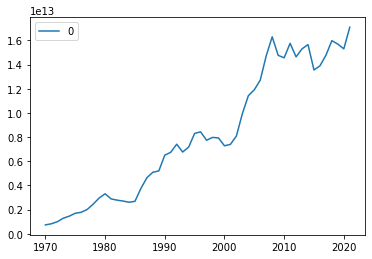

In [64]:
# drop unwanted columns to plot trend of GDP for EU
df_to_plot = data_gdp_eu_20xx.drop(data_gdp_eu_20xx.columns[[0,1,2,3]], axis = 1)
df_to_plot = df_to_plot.T
df_to_plot.plot()

<AxesSubplot:>

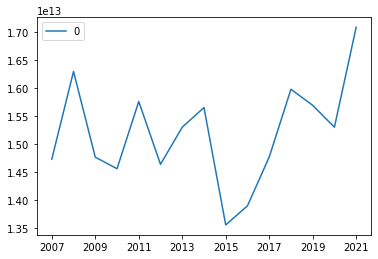

In [65]:
# plot GDP only after 2007
df_2000 = data_gdp_eu_20xx.loc[:, "2007":]
df_2000_plot = df_2000.T
df_2000_plot.plot()

In [66]:
# choose columns > 2018
data_gdp_eu_20xx = data_gdp_eu_20xx.loc[:, ["2017", "2018", "2019", "2020", "2021"]]
data_gdp_eu_20xx

,2017,2018,2019,2020,2021
0,14766273067392.105,15978719985091.496,15691850452107.320,15300141971364.803,17088620744318.824


In [67]:
# get rid of scientific notation
pd.options.display.float_format = "{:.0f}".format
data_gdp_eu_20xx

,2017,2018,2019,2020,2021
0,14766273067392,15978719985091,15691850452107,15300141971365,17088620744319


In [68]:
data_gdp_eu_20xx = data_gdp_eu_20xx.T
data_gdp_eu_20xx

,0
2017,14766273067392
2018,15978719985091
2019,15691850452107
2020,15300141971365
2021,17088620744319


In [69]:
data_gdp_eu_20xx.rename(columns={data_gdp_eu_20xx.columns[0]: "GDP"}, inplace=True)
data_gdp_eu_20xx["year"] = data_gdp_eu_20xx.index
data_gdp_eu_20xx = data_gdp_eu_20xx[["year", "GDP"]]
data_gdp_eu_20xx = data_gdp_eu_20xx.reset_index()
data_gdp_eu_20xx = data_gdp_eu_20xx.drop(data_gdp_eu_20xx.columns[0], axis = 1)
data_gdp_eu_20xx

,year,GDP
0,2017,14766273067392
1,2018,15978719985091
2,2019,15691850452107
3,2020,15300141971365
4,2021,17088620744319


In [70]:
data_gdp_eu_20xx = pd.concat([data_gdp_eu_20xx]*12)
data_gdp_eu_20xx = data_gdp_eu_20xx.reset_index(drop=True)

data_gdp_eu_20xx

,year,GDP
0,2017,14766273067392
1,2018,15978719985091
2,2019,15691850452107
3,2020,15300141971365
4,2021,17088620744319
5,2017,14766273067392
6,2018,15978719985091
7,2019,15691850452107
8,2020,15300141971365
9,2021,17088620744319


In [71]:
data_gdp_eu_20xx = data_gdp_eu_20xx.sort_values("year")
data_gdp_eu_20xx = data_gdp_eu_20xx.reset_index(drop=True)

data_gdp_eu_20xx

,year,GDP
0,2017,14766273067392
1,2017,14766273067392
2,2017,14766273067392
3,2017,14766273067392
4,2017,14766273067392
5,2017,14766273067392
6,2017,14766273067392
7,2017,14766273067392
8,2017,14766273067392
9,2017,14766273067392


In [72]:
df_to_add = pd.DataFrame({"month":["December", "November", "October", "September", "August", "July", "June", "May", "April", "March", "February","January"],
                          "month_no" : ["12", "11", "10", "09", "08", "07", "06", "05", "04", "03", "02", "01"]})
df_to_add = pd.concat([df_to_add]*5)
df_to_add = df_to_add.reset_index(drop=True)

data_gdp_eu_20xx = pd.concat([data_gdp_eu_20xx, df_to_add], axis = 1)
data_gdp_eu_20xx

,year,GDP,month,month_no
0,2017,14766273067392,December,12
1,2017,14766273067392,November,11
2,2017,14766273067392,October,10
3,2017,14766273067392,September,09
4,2017,14766273067392,August,08
5,2017,14766273067392,July,07
6,2017,14766273067392,June,06
7,2017,14766273067392,May,05
8,2017,14766273067392,April,04
9,2017,14766273067392,March,03


In [73]:
data_gdp_eu_20xx = data_gdp_eu_20xx.sort_values(["year", "month_no"])
data_gdp_eu_20xx

,year,GDP,month,month_no
11,2017,14766273067392,January,01
10,2017,14766273067392,February,02
9,2017,14766273067392,March,03
8,2017,14766273067392,April,04
7,2017,14766273067392,May,05
6,2017,14766273067392,June,06
5,2017,14766273067392,July,07
4,2017,14766273067392,August,08
3,2017,14766273067392,September,09
2,2017,14766273067392,October,10


In [74]:
import numpy as np
data_gdp_eu_20xx["GDP"] = np.where(data_gdp_eu_20xx["month"] != "December", np.nan, data_gdp_eu_20xx["GDP"])
data_gdp_eu_20xx

,year,GDP,month,month_no
11,2017,NaN,January,01
10,2017,NaN,February,02
9,2017,NaN,March,03
8,2017,NaN,April,04
7,2017,NaN,May,05
6,2017,NaN,June,06
5,2017,NaN,July,07
4,2017,NaN,August,08
3,2017,NaN,September,09
2,2017,NaN,October,10


In [75]:
data_gdp_eu_20xx = data_gdp_eu_20xx.interpolate().reset_index(drop=True)
data_gdp_eu_20xx

,year,GDP,month,month_no
0,2017,NaN,January,01
1,2017,NaN,February,02
2,2017,NaN,March,03
3,2017,NaN,April,04
4,2017,NaN,May,05
5,2017,NaN,June,06
6,2017,NaN,July,07
7,2017,NaN,August,08
8,2017,NaN,September,09
9,2017,NaN,October,10


In [76]:
data_gdp_eu_20xx = data_gdp_eu_20xx.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
data_gdp_eu_20xx = data_gdp_eu_20xx.drop(data_gdp_eu_20xx.columns[3], axis = 1)
data_gdp_eu_20xx = data_gdp_eu_20xx[["year", "month", "GDP"]]
data_gdp_eu_20xx = data_gdp_eu_20xx.reset_index(drop=True)
data_gdp_eu_20xx

,year,month,GDP
0,2018,January,14867310310534
1,2018,February,14968347553675
2,2018,March,15069384796817
3,2018,April,15170422039959
4,2018,May,15271459283100
5,2018,June,15372496526242
6,2018,July,15473533769383
7,2018,August,15574571012525
8,2018,September,15675608255667
9,2018,October,15776645498808


In [77]:
data_gdp_eu_20xx[["GDP", "year"]] = data_gdp_eu_20xx[["GDP","year"]].apply(pd.to_numeric)

data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        48 non-null     int64  
 1   month       48 non-null     object 
 2   Population  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [78]:
# merging for Population and original table
data_con_train= data_con_train.merge(data_gdp_eu_20xx, how='left', on=['year','month'])

data_con_train.head(35)

,year,month,day,Gas Consumption,Population,GDP
0,2021,December,31,1961,447207489,17088620744319
1,2021,December,30,2880,447207489,17088620744319
2,2021,December,29,3209,447207489,17088620744319
3,2021,December,28,4063,447207489,17088620744319
4,2021,December,27,4443,447207489,17088620744319
5,2021,December,26,4557,447207489,17088620744319
6,2021,December,25,4003,447207489,17088620744319
7,2021,December,24,4560,447207489,17088620744319
8,2021,December,23,6990,447207489,17088620744319
9,2021,December,22,8710,447207489,17088620744319


# Data processing and cleaning for Renewable engery

In [80]:
data_original_ren = pd.read_csv(r"nrg_ind_ren_page_tabular.csv")
pd.options.display.float_format = "{:.3f}".format

In [81]:
data_ren = data_original_ren.drop(data_original_ren.columns[[0, 1]],axis = 1)
data_ren.head()

,unit,geo\TIME_PERIOD\t2011 \t2012 \t2013 \t2014 \t2015 \t2016 \t2017 \t2018 \t2019 \t2020
0,PC,AL\t31.187 \t35.152 \t33.167 \t31.856 \t34.913...
1,PC,AT\t31.552 \t32.734 \t32.665 \t33.550 \t33.498...
2,PC,BA\t17.995 \t18.014 \t19.307 \t24.873 \t26.607...
3,PC,BE\t6.302 \t7.086 \t7.671 \t8.038 \t8.060 \t8....
4,PC,BG\t14.152 \t15.837 \t18.898 \t18.050 \t18.261...


In [82]:
# renaming column with index 1
data_ren.rename(columns={data_ren.columns[1]: "dump"},inplace=True)
data_ren.head()

,unit,dump
0,PC,AL\t31.187 \t35.152 \t33.167 \t31.856 \t34.913...
1,PC,AT\t31.552 \t32.734 \t32.665 \t33.550 \t33.498...
2,PC,BA\t17.995 \t18.014 \t19.307 \t24.873 \t26.607...
3,PC,BE\t6.302 \t7.086 \t7.671 \t8.038 \t8.060 \t8....
4,PC,BG\t14.152 \t15.837 \t18.898 \t18.050 \t18.261...


In [83]:
# splitting values in column "geo" into new columns
data_new_columns = data_ren.dump.str.split("\t", expand=True)
data_new_columns.head()

,0,1,2,3,4,5,6,7,8,9,10
0,AL,31.187,35.152,33.167,31.856,34.913,36.953,35.777,36.572,38.042,45.015
1,AT,31.552,32.734,32.665,33.550,33.498,33.370,33.137,33.784,33.755,36.545
2,BA,17.995,18.014,19.307,24.873,26.607,25.358,23.241,35.972,37.578,:
3,BE,6.302,7.086,7.671,8.038,8.060,8.744,9.136,9.472,9.929,13.000
4,BG,14.152,15.837,18.898,18.050,18.261,18.760,18.695,20.581,21.546,23.319


In [84]:
# concatenating the newly created columns with the original df
data_ren = pd.concat([data_ren, data_new_columns], axis=1)

# renaming the columns
data_ren.columns = ["unit", "dump", "geo", "2011", "2012", "2013", 
                    "2014", "2015", "2016", "2017", "2018", 
                    "2019", "2020"]

# dropping unwanted columns
data_ren.drop(columns=["dump", "2011", "2012", "2013", "2014", "2015", "2016"], inplace=True)

# final df
data_ren.head()

,unit,geo,2017,2018,2019,2020
0,PC,AL,35.777,36.572,38.042,45.015
1,PC,AT,33.137,33.784,33.755,36.545
2,PC,BA,23.241,35.972,37.578,:
3,PC,BE,9.136,9.472,9.929,13.000
4,PC,BG,18.695,20.581,21.546,23.319


In [85]:
# replace ":"-values with 0.0
data_ren = data_ren.replace(regex=r":", value = 0.0)
data_ren.head()

,unit,geo,2017,2018,2019,2020
0,PC,AL,35.777,36.572,38.042,45.015
1,PC,AT,33.137,33.784,33.755,36.545
2,PC,BA,23.241,35.972,37.578,0.000
3,PC,BE,9.136,9.472,9.929,13.000
4,PC,BG,18.695,20.581,21.546,23.319


In [86]:
# changing datatype of prices into float
data_ren[["2017","2018", "2019", "2020"]] = data_ren[["2017","2018", "2019","2020"]].apply(pd.to_numeric)
data_ren.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   unit    39 non-null     object 
 1   geo     39 non-null     object 
 2   2017    39 non-null     float64
 3   2018    39 non-null     float64
 4   2019    39 non-null     float64
 5   2020    39 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.0+ KB


In [87]:
# selecting values for European Union
data_ren_eu = data_ren.set_index("geo")
data_ren_eu = data_ren_eu.loc[["EU27_2020"]]
data_ren_eu = data_ren_eu.reset_index()
data_ren_eu

,geo,unit,2017,2018,2019,2020
0,EU27_2020,PC,18.412,19.096,19.885,22.090


In [88]:
# inserting data for 2021 (assumption that EU will reach their target in 2021, just as they did in 2020)
data_ren[["2021"]] = data_ren[["2020"]].apply(pd.to_numeric)
data_ren_eu["2021"] = 23.08
data_ren_eu

,geo,unit,2017,2018,2019,2020,2021
0,EU27_2020,PC,18.412,19.096,19.885,22.090,23.080


In [89]:
df_ren = data_ren_eu.drop(data_ren_eu.columns[[0, 1]],axis = 1)
df_ren = df_ren.T
df_ren

,0
2017,18.412
2018,19.096
2019,19.885
2020,22.090
2021,23.080


In [90]:
df_ren.rename(columns={df_ren.columns[0]: "Renewable_energy"}, inplace=True)
df_ren["year"] = df_ren.index
df_ren = df_ren.reset_index(drop=True)
df_ren

,Renewable_energy,year
0,18.412,2017
1,19.096,2018
2,19.885,2019
3,22.090,2020
4,23.080,2021


In [91]:
df_ren = pd.concat([df_ren]*12)
df_ren = df_ren.reset_index(drop=True)
df_ren

,Renewable_energy,year
0,18.412,2017
1,19.096,2018
2,19.885,2019
3,22.090,2020
4,23.080,2021
5,18.412,2017
6,19.096,2018
7,19.885,2019
8,22.090,2020
9,23.080,2021


In [92]:
df_ren = df_ren.sort_values("year")
df_ren = df_ren.reset_index(drop=True)
df_ren

,Renewable_energy,year
0,18.412,2017
1,18.412,2017
2,18.412,2017
3,18.412,2017
4,18.412,2017
5,18.412,2017
6,18.412,2017
7,18.412,2017
8,18.412,2017
9,18.412,2017


In [93]:
df_to_add = pd.DataFrame({"month":["December", "November", "October", "September", "August", "July", "June", "May", "April", "March", "February","January"],
                          "month_no" : ["12", "11", "10", "09", "08", "07", "06", "05", "04", "03", "02", "01"]})
df_to_add = pd.concat([df_to_add]*5)
df_to_add = df_to_add.reset_index(drop=True)

df_ren = pd.concat([df_ren, df_to_add], axis = 1)
df_ren

,Renewable_energy,year,month,month_no
0,18.412,2017,December,12
1,18.412,2017,November,11
2,18.412,2017,October,10
3,18.412,2017,September,09
4,18.412,2017,August,08
5,18.412,2017,July,07
6,18.412,2017,June,06
7,18.412,2017,May,05
8,18.412,2017,April,04
9,18.412,2017,March,03


In [94]:
df_ren = df_ren.sort_values(["year", "month_no"])
df_ren

,Renewable_energy,year,month,month_no
11,18.412,2017,January,01
10,18.412,2017,February,02
9,18.412,2017,March,03
8,18.412,2017,April,04
7,18.412,2017,May,05
6,18.412,2017,June,06
5,18.412,2017,July,07
4,18.412,2017,August,08
3,18.412,2017,September,09
2,18.412,2017,October,10


In [95]:
df_ren[["ren_perc", "year", "month_no"]] = df_ren[["Renewable_energy", "year", "month_no"]].apply(pd.to_numeric)
df_ren.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 11 to 48
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Renewable_energy  60 non-null     float64
 1   year              60 non-null     int64  
 2   month             60 non-null     object 
 3   month_no          60 non-null     int64  
 4   ren_perc          60 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.8+ KB


In [96]:
import numpy as np
df_ren["Renewable_energy"] = np.where(df_ren["month"] != "December", np.nan, df_ren["Renewable_energy"])
df_ren

,Renewable_energy,year,month,month_no,ren_perc
11,NaN,2017,January,1,18.412
10,NaN,2017,February,2,18.412
9,NaN,2017,March,3,18.412
8,NaN,2017,April,4,18.412
7,NaN,2017,May,5,18.412
6,NaN,2017,June,6,18.412
5,NaN,2017,July,7,18.412
4,NaN,2017,August,8,18.412
3,NaN,2017,September,9,18.412
2,NaN,2017,October,10,18.412


In [97]:
df_ren = df_ren.interpolate().reset_index(drop=True)
df_ren

,Renewable_energy,year,month,month_no,ren_perc
0,NaN,2017,January,1,18.412
1,NaN,2017,February,2,18.412
2,NaN,2017,March,3,18.412
3,NaN,2017,April,4,18.412
4,NaN,2017,May,5,18.412
5,NaN,2017,June,6,18.412
6,NaN,2017,July,7,18.412
7,NaN,2017,August,8,18.412
8,NaN,2017,September,9,18.412
9,NaN,2017,October,10,18.412


In [98]:
df_ren = df_ren.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
df_ren = df_ren.drop(df_ren.columns[3], axis = 1)
df_ren = df_ren[["year", "month", "Renewable_energy"]]
df_ren = df_ren.reset_index(drop=True)
df_ren

,year,month,Renewable_energy
0,2018,January,18.469
1,2018,February,18.526
2,2018,March,18.583
3,2018,April,18.640
4,2018,May,18.697
5,2018,June,18.754
6,2018,July,18.811
7,2018,August,18.868
8,2018,September,18.925
9,2018,October,18.982


In [99]:
# merging for Population and original table
data_con_train= data_con_train.merge(df_ren, how='left', on=['year','month'])

data_con_train

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy
0,2021,December,31,1960.600,447207489.000,17088620744318.824,23.080
1,2021,December,30,2880.000,447207489.000,17088620744318.824,23.080
2,2021,December,29,3208.600,447207489.000,17088620744318.824,23.080
3,2021,December,28,4063.200,447207489.000,17088620744318.824,23.080
4,2021,December,27,4442.800,447207489.000,17088620744318.824,23.080
...,...,...,...,...,...,...,...
1456,2018,January,5,4190.700,445590607.250,14867310310533.721,18.469
1457,2018,January,4,4203.200,445590607.250,14867310310533.721,18.469
1458,2018,January,3,4470.100,445590607.250,14867310310533.721,18.469
1459,2018,January,2,4055.600,445590607.250,14867310310533.721,18.469


# Data processing and data cleaning for Price

In [150]:
data_original_20xx = pd.read_csv(r"Dutch TTF Natural Gas Futures 2018-2021_daily.csv")

data_original_20xx.head()

,Datum,Zuletzt,Eröffn.,Hoch,Tief,Vol.,+/- %
0,31. Dez. 2021,"70,345","82,000","82,000","67,365","0,08K","-19,17%"
1,30. Dez. 2021,"87,027","94,350","94,350","88,050","0,09K","-9,79%"
2,29. Dez. 2021,"96,476","99,000","104,600","99,000","0,07K","-9,49%"
3,28. Dez. 2021,"106,590","106,590","106,590","106,590","0,00K","-0,29%"
4,27. Dez. 2021,"106,895","100,000","105,500","100,000","0,01K","-19,37%"


In [151]:
data_original_20xx.shape

(1010, 7)

In [152]:
# replace german with english column name
#data_original.rename(columns={data_original.columns[0]: "Date"}, inplace=True)


In [153]:
#drop unwanted columns
data_price_20xx = data_original_20xx.drop(data_original_20xx.columns[2:7],axis = 1)
data_price_20xx.head()

,Datum,Zuletzt
0,31. Dez. 2021,"70,345"
1,30. Dez. 2021,"87,027"
2,29. Dez. 2021,"96,476"
3,28. Dez. 2021,"106,590"
4,27. Dez. 2021,"106,895"


In [154]:
# replace german with english words and bad characters
data_price_20xx = (data_price_20xx.replace(regex=r"Dez", value = "Dec")
                   .replace(regex=r"Okt", value = "Oct")
                   .replace(regex=r"Sept", value = "Sep")
                   .replace(regex=r"Juli", value = "Jul.")
                   .replace(regex=r"Juni", value = "Jun.")
                   .replace(regex=r"Mai", value = "May.")
                   .replace(regex=r"März", value = "Mar.")
                   .replace(regex=r". ", value = "-")
                   .replace(regex=r",", value = ".")
)

data_price_20xx.head()

,Datum,Zuletzt
0,31-Dec-2021,70.345
1,30-Dec-2021,87.027
2,29-Dec-2021,96.476
3,28-Dec-2021,106.590
4,27-Dec-2021,106.895


In [155]:
# convert Date into datetime-datatype
data_price_20xx["Datum"] = pd.to_datetime(data_price_20xx["Datum"])
data_price_20xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Datum    1010 non-null   datetime64[ns]
 1   Zuletzt  1010 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.9+ KB


In [156]:
# change "Zuletzt"-datatype into float
#data_price_20xx["Zuletzt"] = pd.to_numeric(data_price_20xx["Zuletzt"])

data_price_20xx["Zuletzt"]= data_price_20xx["Zuletzt"].astype(np.float64)
data_price_20xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Datum    1010 non-null   datetime64[ns]
 1   Zuletzt  1010 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.9 KB


In [157]:
data_price_20xx = data_price_20xx.assign(day = data_price_20xx["Datum"].dt.strftime("%d"),
                                         month = data_price_20xx["Datum"].dt.strftime("%B"),
                                         month_no =  data_price_20xx["Datum"].dt.strftime("%m"),
                                         year = data_price_20xx["Datum"].dt.strftime("%Y")
                                         )
                                         
data_price_20xx.head()                          

,Datum,Zuletzt,day,month,month_no,year
0,2021-12-31,70.345,31,December,12,2021
1,2021-12-30,87.027,30,December,12,2021
2,2021-12-29,96.476,29,December,12,2021
3,2021-12-28,106.590,28,December,12,2021
4,2021-12-27,106.895,27,December,12,2021


In [158]:
# drop unwanted columns
data_price_20xx = data_price_20xx.drop(data_price_20xx.columns[[0,4]], axis=1)
data_price_20xx

,Zuletzt,day,month,year
0,70.345,31,December,2021
1,87.027,30,December,2021
2,96.476,29,December,2021
3,106.590,28,December,2021
4,106.895,27,December,2021
...,...,...,...,...
1005,19.050,08,January,2018
1006,18.910,05,January,2018
1007,19.200,04,January,2018
1008,19.320,03,January,2018


In [159]:
# rename column "Zuletzt"
data_price_20xx.rename(columns={data_price_20xx.columns[0]: "Price"}, inplace=True)
#data_price_20xx.rename(columns={data_price_20xx.columns[1]: "month"}, inplace=True)
data_price_20xx

,Price,day,month,year
0,70.345,31,December,2021
1,87.027,30,December,2021
2,96.476,29,December,2021
3,106.590,28,December,2021
4,106.895,27,December,2021
...,...,...,...,...
1005,19.050,08,January,2018
1006,18.910,05,January,2018
1007,19.200,04,January,2018
1008,19.320,03,January,2018


In [160]:
data_con_train

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy
0,2021,December,31,1960.600,447207489.000,17088620744318.824,23.080
1,2021,December,30,2880.000,447207489.000,17088620744318.824,23.080
2,2021,December,29,3208.600,447207489.000,17088620744318.824,23.080
3,2021,December,28,4063.200,447207489.000,17088620744318.824,23.080
4,2021,December,27,4442.800,447207489.000,17088620744318.824,23.080
...,...,...,...,...,...,...,...
1456,2018,January,5,4190.700,445590607.250,14867310310533.721,18.469
1457,2018,January,4,4203.200,445590607.250,14867310310533.721,18.469
1458,2018,January,3,4470.100,445590607.250,14867310310533.721,18.469
1459,2018,January,2,4055.600,445590607.250,14867310310533.721,18.469


In [161]:
data_price_20xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1010 non-null   float64
 1   day     1010 non-null   object 
 2   month   1010 non-null   object 
 3   year    1010 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.7+ KB


In [162]:
# changing datatype of prices into float
data_price_20xx[['Price','year','day']] = data_price_20xx[['Price','year','day']].apply(pd.to_numeric)
data_price_20xx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1010 non-null   float64
 1   day     1010 non-null   int64  
 2   month   1010 non-null   object 
 3   year    1010 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 31.7+ KB


In [163]:
# merging for price and original table
merged_data = data_con_train.merge(data_price_20xx, how='left', on=['month','year','day'])
merged_data

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy,Price
0,2021,December,31,1960.600,447207489.000,17088620744318.824,23.080,70.345
1,2021,December,30,2880.000,447207489.000,17088620744318.824,23.080,87.027
2,2021,December,29,3208.600,447207489.000,17088620744318.824,23.080,96.476
3,2021,December,28,4063.200,447207489.000,17088620744318.824,23.080,106.590
4,2021,December,27,4442.800,447207489.000,17088620744318.824,23.080,106.895
...,...,...,...,...,...,...,...,...
1456,2018,January,5,4190.700,445590607.250,14867310310533.721,18.469,18.910
1457,2018,January,4,4203.200,445590607.250,14867310310533.721,18.469,19.200
1458,2018,January,3,4470.100,445590607.250,14867310310533.721,18.469,19.320
1459,2018,January,2,4055.600,445590607.250,14867310310533.721,18.469,19.320


In [164]:
merged_data.isnull().sum()

year                  0
month                 0
day                   0
Gas Consumption       0
Population            0
GDP                   0
Renewable_energy      0
Price               451
dtype: int64

In [165]:
merged_data.loc[len(merged_data.index)] = [2017,'December', 31, 153.600, 448911666.667, 14867310310533.721, 18.010, 19.100]

In [166]:
merged_data.loc[len(merged_data.index)] = [2022,'January',1, 153.600, 448911666.667, 17347798158940.996, 23.657, 71.345]

In [167]:
merged_data

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy,Price
0,2021,December,31,1960.600,447207489.000,17088620744318.824,23.080,70.345
1,2021,December,30,2880.000,447207489.000,17088620744318.824,23.080,87.027
2,2021,December,29,3208.600,447207489.000,17088620744318.824,23.080,96.476
3,2021,December,28,4063.200,447207489.000,17088620744318.824,23.080,106.590
4,2021,December,27,4442.800,447207489.000,17088620744318.824,23.080,106.895
...,...,...,...,...,...,...,...,...
1458,2018,January,3,4470.100,445590607.250,14867310310533.721,18.469,19.320
1459,2018,January,2,4055.600,445590607.250,14867310310533.721,18.469,19.320
1460,2018,January,1,3118.400,445590607.250,14867310310533.721,18.469,NaN
1461,2017,December,31,153.600,448911666.667,14867310310533.721,18.010,19.100


In [169]:
merged_data = pd.concat([merged_data.iloc[[1462],:], merged_data.drop(1462, axis=0)], axis=0)
merged_data

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy,Price
1462,2022,January,1,153.600,448911666.667,17347798158940.996,23.657,71.345
0,2021,December,31,1960.600,447207489.000,17088620744318.824,23.080,70.345
1,2021,December,30,2880.000,447207489.000,17088620744318.824,23.080,87.027
2,2021,December,29,3208.600,447207489.000,17088620744318.824,23.080,96.476
3,2021,December,28,4063.200,447207489.000,17088620744318.824,23.080,106.590
...,...,...,...,...,...,...,...,...
1457,2018,January,4,4203.200,445590607.250,14867310310533.721,18.469,19.200
1458,2018,January,3,4470.100,445590607.250,14867310310533.721,18.469,19.320
1459,2018,January,2,4055.600,445590607.250,14867310310533.721,18.469,19.320
1460,2018,January,1,3118.400,445590607.250,14867310310533.721,18.469,NaN


In [170]:
merged_data.reset_index(drop= True)

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy,Price
0,2022,January,1,153.600,448911666.667,17347798158940.996,23.657,71.345
1,2021,December,31,1960.600,447207489.000,17088620744318.824,23.080,70.345
2,2021,December,30,2880.000,447207489.000,17088620744318.824,23.080,87.027
3,2021,December,29,3208.600,447207489.000,17088620744318.824,23.080,96.476
4,2021,December,28,4063.200,447207489.000,17088620744318.824,23.080,106.590
...,...,...,...,...,...,...,...,...
1458,2018,January,4,4203.200,445590607.250,14867310310533.721,18.469,19.200
1459,2018,January,3,4470.100,445590607.250,14867310310533.721,18.469,19.320
1460,2018,January,2,4055.600,445590607.250,14867310310533.721,18.469,19.320
1461,2018,January,1,3118.400,445590607.250,14867310310533.721,18.469,NaN


In [171]:
merged_data = merged_data.interpolate().reset_index(drop=True)
merged_data

,year,month,day,Gas Consumption,Population,GDP,Renewable_energy,Price
0,2022,January,1,153.600,448911666.667,17347798158940.996,23.657,71.345
1,2021,December,31,1960.600,447207489.000,17088620744318.824,23.080,70.345
2,2021,December,30,2880.000,447207489.000,17088620744318.824,23.080,87.027
3,2021,December,29,3208.600,447207489.000,17088620744318.824,23.080,96.476
4,2021,December,28,4063.200,447207489.000,17088620744318.824,23.080,106.590
...,...,...,...,...,...,...,...,...
1458,2018,January,4,4203.200,445590607.250,14867310310533.721,18.469,19.200
1459,2018,January,3,4470.100,445590607.250,14867310310533.721,18.469,19.320
1460,2018,January,2,4055.600,445590607.250,14867310310533.721,18.469,19.320
1461,2018,January,1,3118.400,445590607.250,14867310310533.721,18.469,19.210


In [173]:
# drop unwanted columns
merged_data = merged_data.drop(merged_data.index[[0,1462]], axis=0)

In [174]:
# setting column's order
merged_data = merged_data[["year","month","day","Population","GDP" ,"Renewable_energy","Price","Gas Consumption"]]
merged_data

,year,month,day,Population,GDP,Renewable_energy,Price,Gas Consumption
1,2021,December,31,447207489.000,17088620744318.824,23.080,70.345,1960.600
2,2021,December,30,447207489.000,17088620744318.824,23.080,87.027,2880.000
3,2021,December,29,447207489.000,17088620744318.824,23.080,96.476,3208.600
4,2021,December,28,447207489.000,17088620744318.824,23.080,106.590,4063.200
5,2021,December,27,447207489.000,17088620744318.824,23.080,106.895,4442.800
...,...,...,...,...,...,...,...,...
1457,2018,January,5,445590607.250,14867310310533.721,18.469,18.910,4190.700
1458,2018,January,4,445590607.250,14867310310533.721,18.469,19.200,4203.200
1459,2018,January,3,445590607.250,14867310310533.721,18.469,19.320,4470.100
1460,2018,January,2,445590607.250,14867310310533.721,18.469,19.320,4055.600


In [176]:
merged_data.isnull().sum()

year                0
month               0
day                 0
Population          0
GDP                 0
Renewable_energy    0
Price               0
Gas Consumption     0
dtype: int64

In [114]:
#merged_data = merged_data.sort_values((['year']), ascending=False).reset_index()

# drop unwanted columns
#merged_data = merged_data.drop(merged_data.columns[[0]], axis=1)


In [177]:
merged_data.to_csv("Train_Final project_Data cleaning_Consumption_2018 to 2021_SY.csv", index= False)